In [ ]:
from google.colab import files
coffee_production = files.upload()

Saving total-production.csv to total-production.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Extract the filename
filename = list(coffee_production.keys())[0]

# Load the Excel file
df = pd.read_csv(filename)

#**Coffee Production Stats**

In [ ]:
df = pd.read_csv('total-production.csv').T
df.head()


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0


In [ ]:
df.columns=df.iloc[0]
df.drop("total_production")
df.head()


total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0


#**Top 10 Producers**

In [ ]:
# Convert all columns to numeric if possible
df = df.apply(pd.to_numeric, errors='coerce')

# Then sum the numeric ones
top10_producers=df.sum().sort_values(ascending=False).iloc[:10]
top10_producers





,0
total_production,
Brazil,1.190966e+06
Viet Nam,4.395410e+05
Colombia,3.458714e+05
Indonesia,2.451168e+05
Ethiopia,1.415429e+05
India,1.320257e+05
Mexico,1.269082e+05
Guatemala,1.134011e+05
Honduras,1.054566e+05


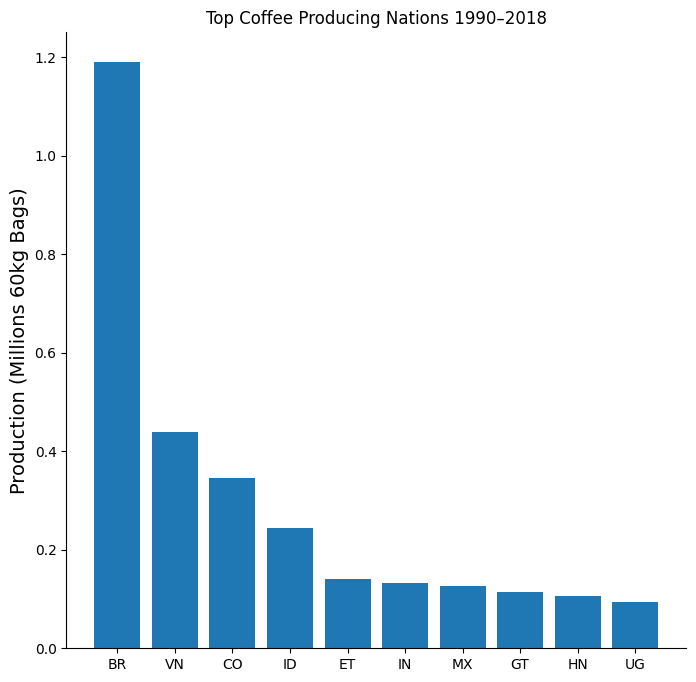

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(x=top10_producers.index, height=top10_producers / 1000000)

positions = list(range(10))
labels = ["BR", "VN", "CO", "ID", "ET", "IN", "MX", "GT", "HN", "UG"]

ax.set_title("Top Coffee Producing Nations 1990–2018")
ax.set_ylabel("Production (Millions 60kg Bags)", fontsize=14)

ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


#**Top 5 nations over time**

In [ ]:
top5 = df.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]
top5.index = top5.index.astype('datetime64[ns]')

top5.head()


total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.000,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.0470,3631.609,12964.000,5367.878,2762.730


In [ ]:
df = df.iloc[1:]  #had to drop 1st row,initially
df.head()


total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0
1995,62.109,142.485,18060.2022,433.980,1888.233,4573.429,785.009,91.235,1002.363,22.843,...,209.448,43.768,35.595,1317.226,84.401,17.629,3243.584,1466.554,3970.086,0.0
1996,70.925,124.579,29196.7430,400.969,1992.914,8220.584,849.008,48.650,1089.348,25.563,...,210.742,40.910,36.999,1403.581,290.586,18.188,3418.724,1206.162,5752.481,0.0


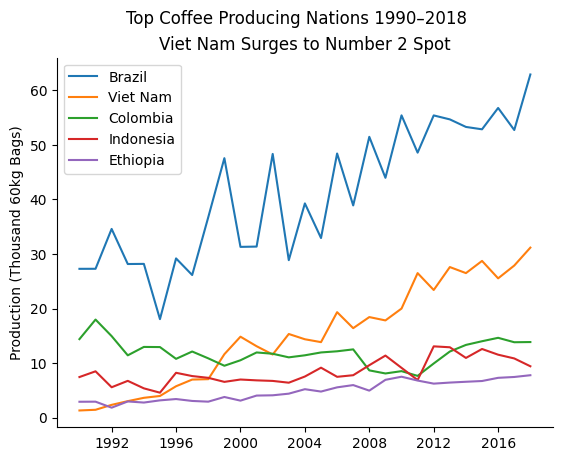

In [ ]:
fig, ax = plt.subplots()

ax.plot(top5.index, top5["Brazil"] / 1000, label="Brazil")
ax.plot(top5.index, top5["Viet Nam"] / 1000, label="Viet Nam")
ax.plot(top5.index, top5["Colombia"] / 1000, label="Colombia")
ax.plot(top5.index, top5["Indonesia"] / 1000, label="Indonesia")
ax.plot(top5.index, top5["Ethiopia"] / 1000, label="Ethiopia")

fig.suptitle("Top Coffee Producing Nations 1990–2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("Production (Thousand 60kg Bags)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()
plt.show()



#**Composition Over Time**

**Brazil's share of total coffee production in comparison to other nations**

In [ ]:
brazil_vs_others = (df
    .assign(rest_of_world =df
        .drop("Brazil", axis=1).sum(axis=1))
    .loc[:, ["Brazil", "rest_of_world"]]
    .astype({"Brazil": "float64"})
)

brazil_vs_others


total_production,Brazil,rest_of_world
1992,34603.3542,63922.5450
1993,28166.9786,63597.6430
1994,28192.0470,65121.1470
1995,18060.2022,69257.2560
1996,29196.7430,74105.8530
1997,26148.0040,73713.1950
1998,36760.8533,72131.3598
1999,47577.8065,83805.9902
2000,31310.3530,82456.6197
2001,31365.0955,76534.0309


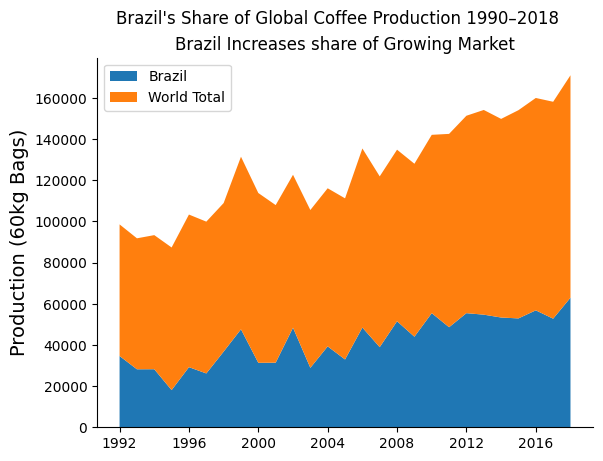

In [ ]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"),
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"]
)

fig.suptitle("Brazil's Share of Global Coffee Production 1990–2018")
ax.set_title("Brazil Increases share of Growing Market")

ax.set_ylabel("Production (60kg Bags)", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc="upper left")


#**Price Relationships**

**We want to see how Brazil compares to it's competitors in terms of production.Scatterplot-Brazil vs Vietnam & Brazil vs Venenzula**

##**Brazil vs Venenzula**

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

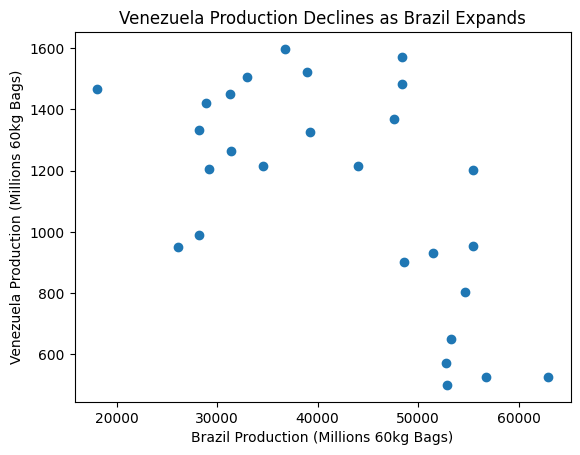

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    df["Brazil"],
    df["Venezuela"]
)

ax.set_title("Venezuela Production Declines as Brazil Expands")
ax.set_ylabel("Venezuela Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")


##**Brazil vs Viet Nam**

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

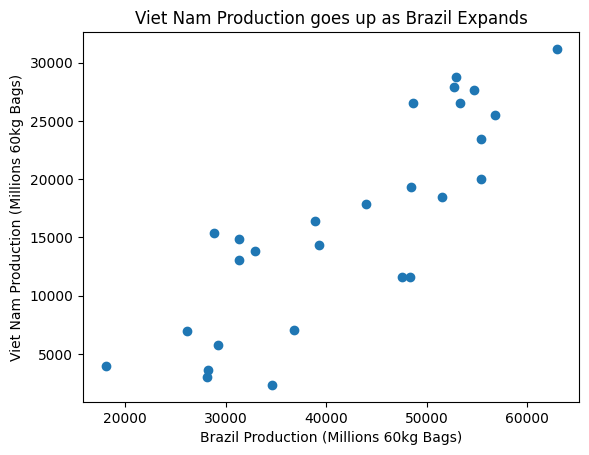

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    df["Brazil"],
    df["Viet Nam"]
)

ax.set_title("Viet Nam Production goes up as Brazil Expands")
ax.set_ylabel("Viet Nam Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")


#**Composition of coffee production**



*   Create a pie chart with top 5 producers along with the sum of others
*   Finally create a donut chart of Brazil's share of total coffee production in 1998 and 2018





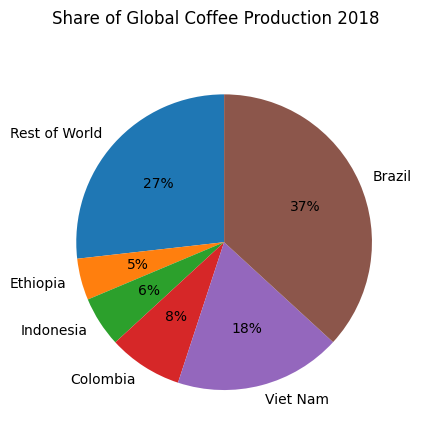

In [ ]:
# Add 'Rest of World' column
df["Rest of World"] = df.drop(
    ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"], axis=1
).sum(axis=1)

# Select 2018 data for the top 5 + Rest of World
coffee_production_top5_2018 = df.loc['2018', [
    "Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia", "Rest of World"
]]

# Plotting pie chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(
    coffee_production_top5_2018[::-1],
    labels=list(coffee_production_top5_2018.index[::-1]),
    autopct="%.0f%%",
    startangle=90
)
fig.suptitle("Share of Global Coffee Production 2018")
plt.show()


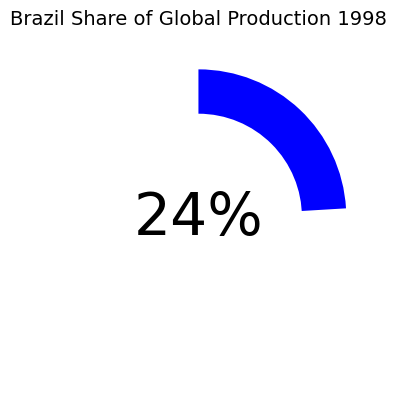

In [ ]:
# Create Brazil vs Rest of World DataFrame
brazil_vs_others = (
    df
    .assign(rest_of_world=df.drop("Brazil", axis=1).sum(axis=1))
    .loc[:, ["Brazil", "rest_of_world"]]
    .astype({"Brazil": "float64"})
)

# Doughnut chart for 1990
fig, ax = plt.subplots()
ax.pie(
    brazil_vs_others.loc["1998"].sort_values(ascending=False),
    startangle=90,
    labels=["", ""],
    pctdistance=0.85,
    colors=["White", "Blue"]
)

# Add circle for doughnut effect
hole = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(hole)

# Add Brazil % in center
plt.text(
    0, 0,
    f"{round((brazil_vs_others.loc['1998', 'Brazil'] / brazil_vs_others.loc['1998'].sum()) * 100)}%",
    ha='center', va='center', fontsize=42
)

ax.set_title("Brazil Share of Global Production 1998", fontsize=14)
plt.show()


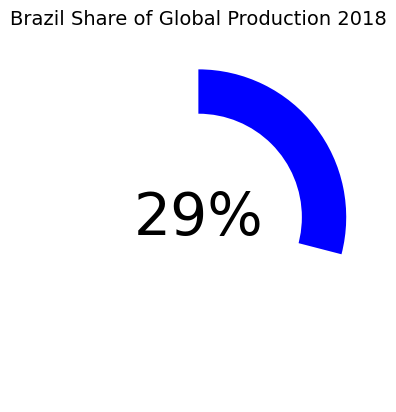

In [ ]:
# Create Brazil vs Rest of World DataFrame
brazil_vs_others = (
    df
    .assign(rest_of_world=df.drop("Brazil", axis=1).sum(axis=1))
    .loc[:, ["Brazil", "rest_of_world"]]
    .astype({"Brazil": "float64"})
)

# Doughnut chart for 1990
fig, ax = plt.subplots()
ax.pie(
    brazil_vs_others.loc["2018"].sort_values(ascending=False),
    startangle=90,
    labels=["", ""],
    pctdistance=0.85,
    colors=["White", "Blue"]
)

# Add circle for doughnut effect
hole = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(hole)

# Add Brazil % in center
plt.text(
    0, 0,
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()) * 100)}%",
    ha='center', va='center', fontsize=42
)

ax.set_title("Brazil Share of Global Production 2018", fontsize=14)
plt.show()

#**Coffee Consumption vs Prices**

**Compare coffee prices vs coffee consumption in the following countries**

**Is there a relationship between these two variables**

**Plot a dual axis bar chart of price vs consumption totals for these countries**

In [ ]:
from google.colab import files
imports = files.upload()

Saving imports.csv to imports.csv


In [ ]:
Consumption = pd.read_csv('imports.csv').set_index("imports").mean(axis=1)
Consumption.name="imports"
Consumption.head()

,imports
imports,
Austria,1551.083333
Belgium,4639.533333
Belgium/Luxembourg,2329.444444
Bulgaria,397.250000
Croatia,349.136364


In [ ]:
from google.colab import files
imports = files.upload()

Saving retail-prices.csv to retail-prices.csv


In [ ]:
prices= pd.read_csv('retail-prices.csv').set_index("retail_prices").mean(axis=1)
prices.head()

,0
retail_prices,
Austria,11.571135
Cyprus,10.437695
Denmark,10.494025
Finland,7.211692
France,6.850879


In [ ]:
price_cons = (pd.DataFrame(prices)
              .merge(Consumption,
                     left_on=prices.index,
                     right_on=Consumption.index,
                     how="inner")
              .sort_values(["imports"], ascending=False)
             )

price_cons.columns = ["country", "Price", "Imports"]

price_cons["country"] = price_cons["country"].str.strip(" ")

price_cons


,country,Price,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


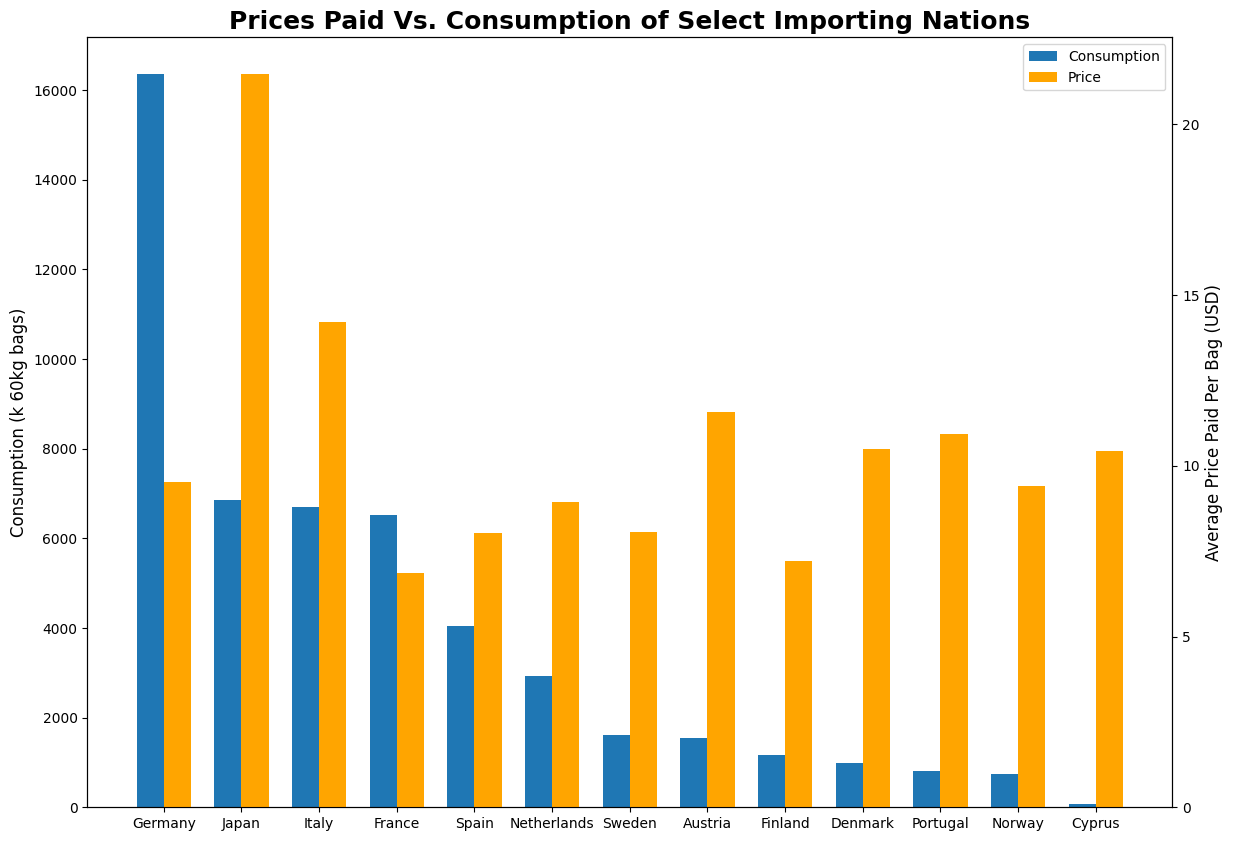

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

width = .35
x = np.arange(0, len(price_cons["country"]))

bar1 = ax.bar(x - width/2, price_cons["Imports"], width=width)

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)

ax2 = ax.twinx()

bar2 = ax2.bar(x + width/2, price_cons["Price"], width=width, color="orange")
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)

plt.xticks(x, price_cons["country"], fontsize=7)

ax.legend([bar1, bar2], ["Consumption", "Price"])
